In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import scIB
import anndata
#import helpers
plt.rcParams['figure.figsize'] = (15, 15)

In [2]:
xie_csv = pd.read_csv('/home/p/pohll/Desktop/MP/data/xie/GSE104154_d0_d21_sma_tm_Expr_raw.csv', index_col='id')

In [3]:
xie_csv.head()

,symbol,AAACCTGAGGACATTA-1,AAACCTGCAGTCGTGC-1,AAACCTGCATGAAGTA-1,AAACCTGTCTCGCATC-1,AAACGGGTCCTAGAAC-1,AAACGGGTCTAAGCCA-1,AAAGCAAAGGACTGGT-1,AAAGCAAGTAGGCATG-1,AAAGCAAGTGTTGAGG-1,...,TTGTAGGCAAAGCAAT-6,TTGTAGGGTCAATACC-6,TTGTAGGTCCCATTTA-6,TTTACTGCAACACCTA-6,TTTACTGTCTGGCGAC-6,TTTCCTCGTTTAGGAA-6,TTTGCGCCAATGAAAC-6,TTTGGTTCAGTAGAGC-6,TTTGTCAAGCTACCGC-6,TTTGTCACATCGGGTC-6
id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000051951,Xkr4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000089699,Gm1992,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000102343,Gm37381,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000025900,Rp1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000109048,Rp1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
xie_csv.index = xie_csv.symbol
xie_csv = xie_csv.drop('symbol', axis=1)
xie_csv = anndata.AnnData(xie_csv)

/mnt/cip/home/p/pohll/mambaforge/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
xie_csv

AnnData object with n_obs × n_vars = 27998 × 10410

In [6]:
xie_csv.obs

""
symbol
Xkr4
Gm1992
Gm37381
Rp1
Rp1
...
AC168977.1
PISD
DHRSX


In [7]:
xie_csv.var

""
AAACCTGAGGACATTA-1
AAACCTGCAGTCGTGC-1
AAACCTGCATGAAGTA-1
AAACCTGTCTCGCATC-1
AAACGGGTCCTAGAAC-1
...
TTTCCTCGTTTAGGAA-6
TTTGCGCCAATGAAAC-6
TTTGGTTCAGTAGAGC-6
TTTGTCAAGCTACCGC-6


In [8]:
xie_csv

AnnData object with n_obs × n_vars = 27998 × 10410

In [9]:
xie_unprocessed = sc.read('/home/p/pohll/Desktop/MP/data/xie.h5ad')
xie_processed = sc.read('/home/p/pohll/Desktop/MP/data/xie/processed.h5ad')

/mnt/cip/home/p/pohll/mambaforge/envs/scanpy/lib/python3.9/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/mnt/cip/home/p/pohll/mambaforge/envs/scanpy/lib/python3.9/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(
/mnt/cip/home/p/pohll/mambaforge/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [10]:
xie_unprocessed

AnnData object with n_obs × n_vars = 10337 × 18181
    obs: 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'size_factors', 'sample', 'cond', 'louvain', 'annotation', 'test', 'louvain_macro', 'louvain_fibro', 'louvain_macro2', 'louvain_final'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cond_colors', 'louvain', 'louvain_colors', 'louvain_final_colors', 'louvain_macro2_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [11]:
xie_processed

AnnData object with n_obs × n_vars = 10337 × 18181
    obs: 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'size_factors', 'sample', 'cond', 'louvain', 'annotation', 'test', 'louvain_macro', 'louvain_fibro', 'louvain_macro2', 'louvain_final'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cond_colors', 'louvain', 'louvain_colors', 'louvain_final_colors', 'louvain_macro2_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [12]:
xie_processed.obs['sample']=xie_processed.obs.index.str.split('-').str[1]
xie_processed.obs['cond']='control'
xie_processed.obs.loc[xie_processed.obs['sample'].isin(['4', '5', '6']), 'cond']='bleo'

In [13]:
xie_processed.obs

,n_counts,log_counts,n_genes,percent_mito,size_factors,sample,cond,louvain,annotation,test,louvain_macro,louvain_fibro,louvain_macro2,louvain_final
index,,,,,,,,,,,,,,
AAACCTGAGGACATTA-1,2549.0,7.843456,1223,0.0,0.747714,1,control,lipofibroblasts,Col13a1,1,lipofibroblasts,lipofibroblasts,lipofibroblasts,lipofibroblasts
AAACCTGCAGTCGTGC-1,2271.0,7.727975,1186,0.0,0.790687,1,control,Hpp1 fibroblasts,Myofibroblasts,1,Hpp1 fibroblasts,"Hpp1 fibroblasts,0","Hpp1 fibroblasts,0","Hpp1 fibroblasts,0"
AAACCTGCATGAAGTA-1,1642.0,7.403670,885,0.0,0.532762,1,control,Am,Lipofibroblasts,1,"Am,1","Am,1","Am,1","Am,1"
AAACCTGTCTCGCATC-1,1196.0,7.086738,680,0.0,0.399068,1,control,Hpp1 fibroblasts,Myofibroblasts,1,Hpp1 fibroblasts,"Hpp1 fibroblasts,0","Hpp1 fibroblasts,0","Hpp1 fibroblasts,0"
AAACGGGTCCTAGAAC-1,944.0,6.850126,595,0.0,0.310070,1,control,Hpp1 fibroblasts,Myofibroblasts,1,Hpp1 fibroblasts,"Hpp1 fibroblasts,0","Hpp1 fibroblasts,0","Hpp1 fibroblasts,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCGTTTAGGAA-6,7401.0,8.909370,2026,0.0,1.687628,6,bleo,AT2,nan,6,AT2,AT2,AT2,AT2
TTTGCGCCAATGAAAC-6,2212.0,7.701653,1147,0.0,0.874924,6,bleo,t-cells 1,nan,6,t-cells 1,t-cells 1,t-cells 1,t-cells 1
TTTGGTTCAGTAGAGC-6,2096.0,7.647786,1029,0.0,0.764480,6,bleo,b-cells2,nan,6,b-cells2,b-cells2,b-cells2,b-cells2


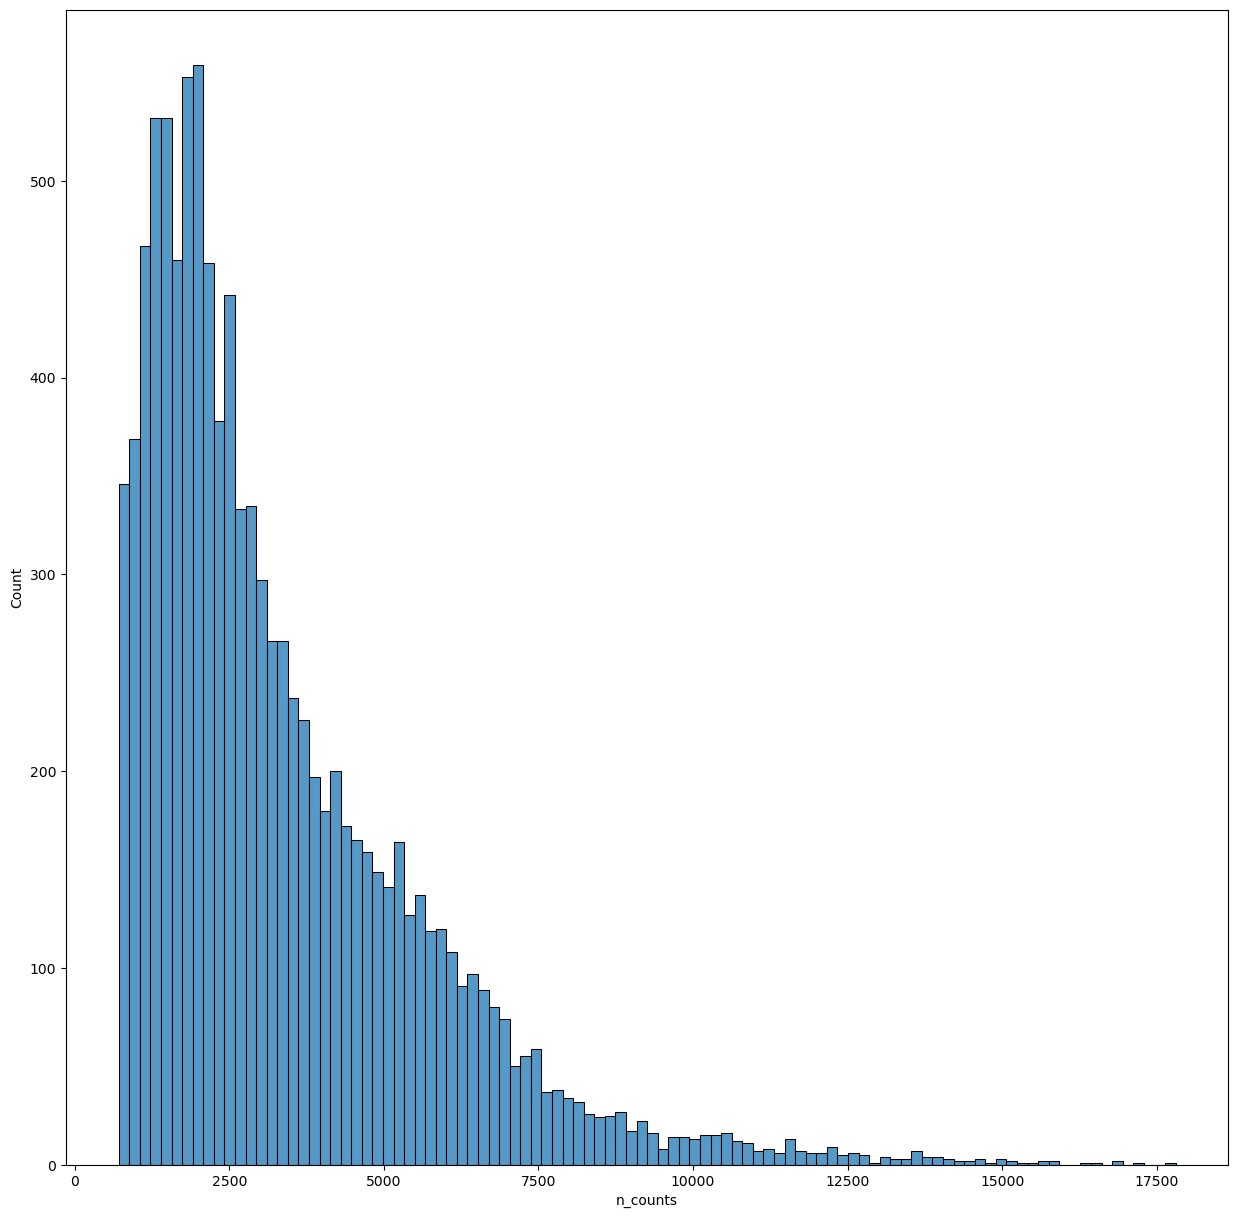

In [14]:
p2 = sns.histplot(xie_processed.obs["n_counts"], bins=100, kde=False)

In [15]:
sc.pp.filter_cells(xie_processed, min_genes=300)
sc.pp.filter_cells(xie_processed, max_genes=4300)
sc.pp.filter_cells(xie_processed, max_counts=18000)

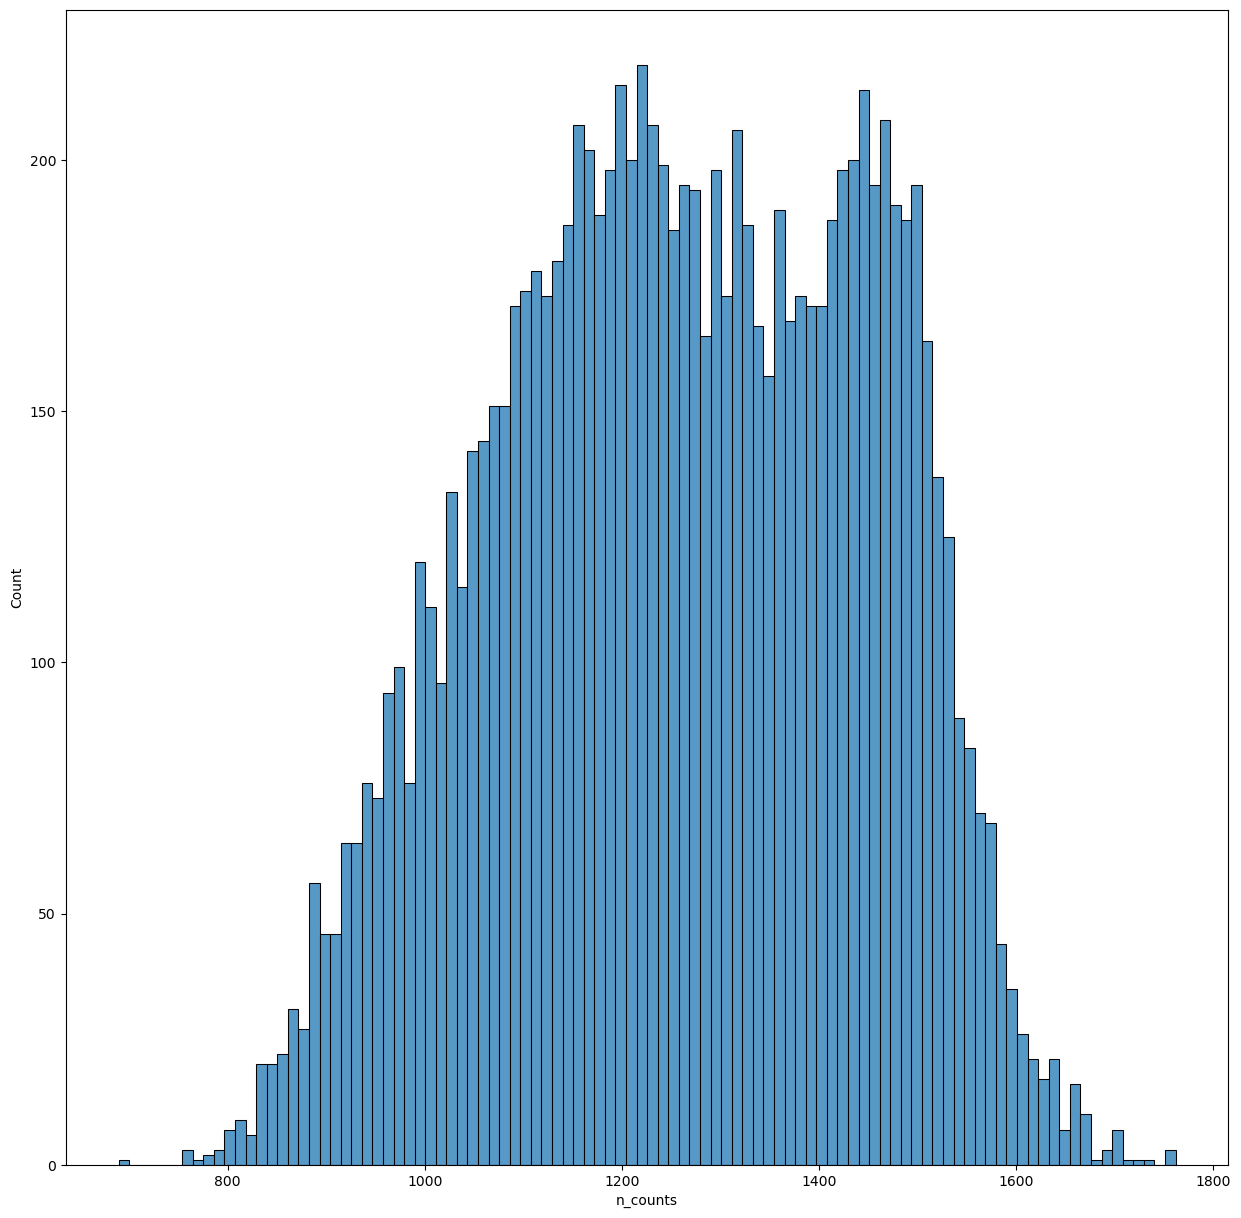

In [16]:
p2 = sns.histplot(xie_processed.obs["n_counts"], bins=100, kde=False)

In [17]:
xie_processed.obs["annotation"]

index
AAACCTGAGGACATTA-1            Col13a1
AAACCTGCAGTCGTGC-1     Myofibroblasts
AAACCTGCATGAAGTA-1    Lipofibroblasts
AAACCTGTCTCGCATC-1     Myofibroblasts
AAACGGGTCCTAGAAC-1     Myofibroblasts
                           ...       
TTTCCTCGTTTAGGAA-6                nan
TTTGCGCCAATGAAAC-6                nan
TTTGGTTCAGTAGAGC-6                nan
TTTGTCAAGCTACCGC-6                nan
TTTGTCACATCGGGTC-6                nan
Name: annotation, Length: 10337, dtype: category
Categories (9, object): ['Col13a1', 'Col14a1', 'Endothelial', 'Lipofibroblasts', ..., 'Methothelial', 'Myofibroblasts', 'PDGFrb', 'nan']

In [18]:
xie_processed.obs["n_counts"]

index
AAACCTGAGGACATTA-1    1322.293247
AAACCTGCAGTCGTGC-1    1211.080362
AAACCTGCATGAAGTA-1    1151.689352
AAACCTGTCTCGCATC-1     977.700657
AAACGGGTCCTAGAAC-1     947.626031
                         ...     
TTTCCTCGTTTAGGAA-6    1504.895807
TTTGCGCCAATGAAAC-6    1142.636282
TTTGGTTCAGTAGAGC-6    1131.856302
TTTGTCAAGCTACCGC-6    1153.754699
TTTGTCACATCGGGTC-6    1230.555282
Name: n_counts, Length: 10337, dtype: float64

In [19]:
xie_processed.var["n_cells"]

index
Xkr4                14
Rp1                 10
Sox17              288
Mrpl15            1213
Lypla1            1347
                  ... 
AC168977.2          10
AC168977.1         169
PISD              4684
DHRSX              993
CAAA01147332.1     111
Name: n_cells, Length: 18181, dtype: int64

In [20]:
xie_processed.obs['sample']=xie_processed.obs.index.str.split('-').str[1]
xie_processed.obs['cond']='control'
xie_processed.obs.loc[xie_processed.obs['sample'].isin(['4', '5', '6']), 'cond']='bleo'

/mnt/cip/home/p/pohll/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/cip/home/p/pohll/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


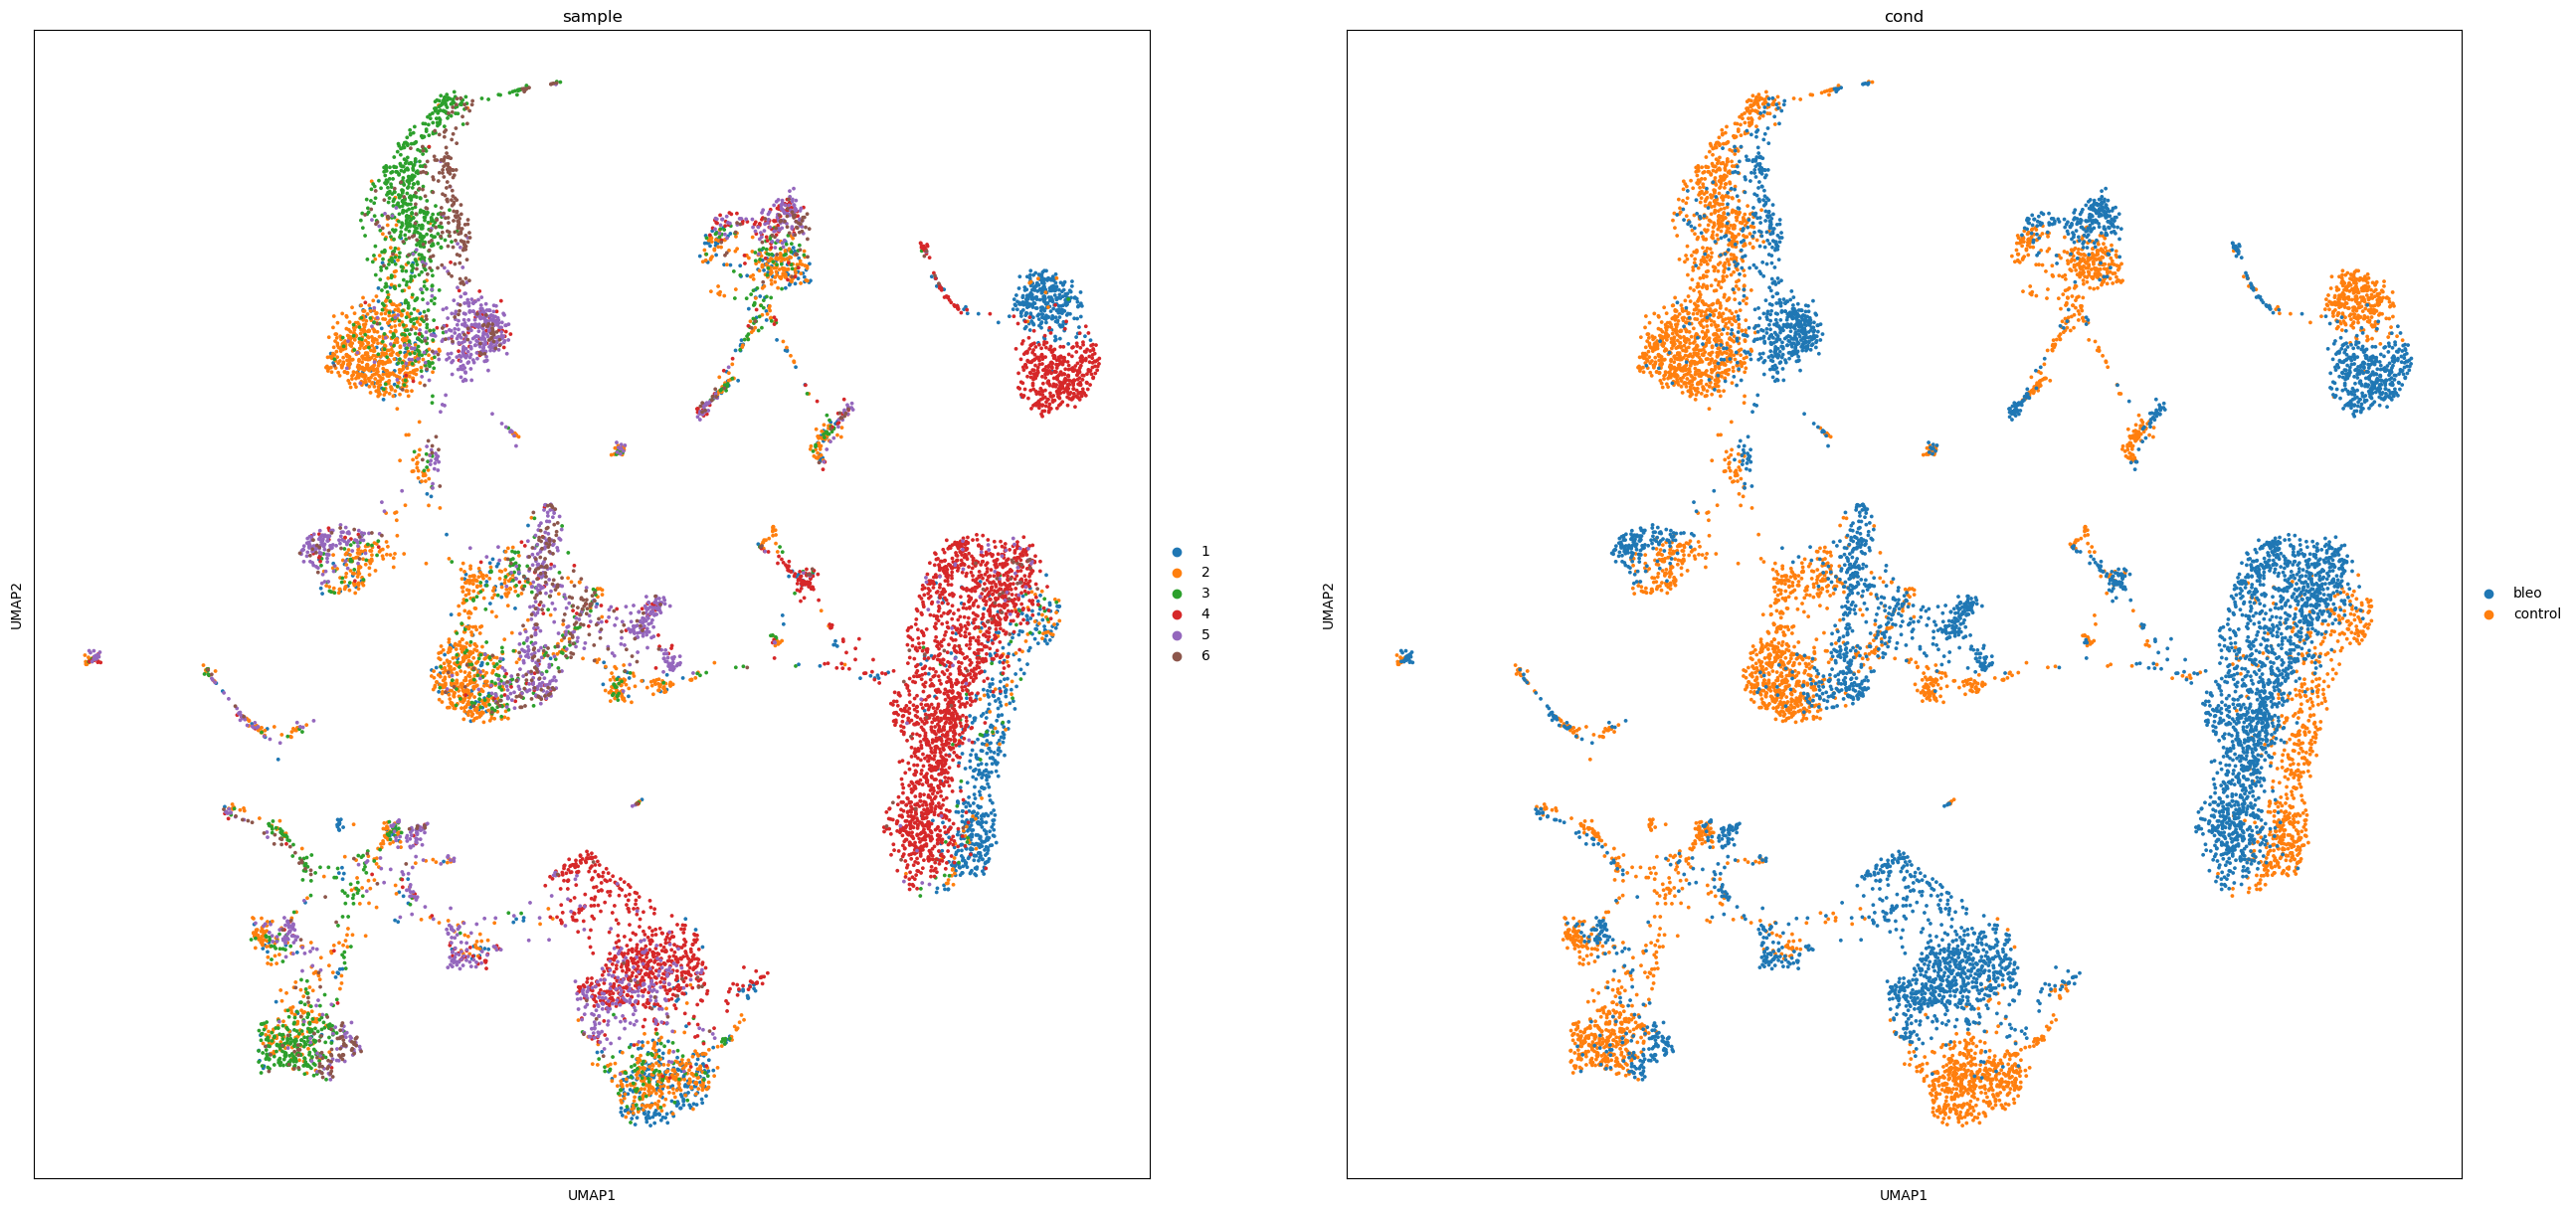

In [21]:
# umap color by sample (left) and condition (right) (--> small batch effect?)
sc.pl.umap(xie_processed, color=['sample', 'cond'], size=30)

/mnt/cip/home/p/pohll/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/cip/home/p/pohll/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


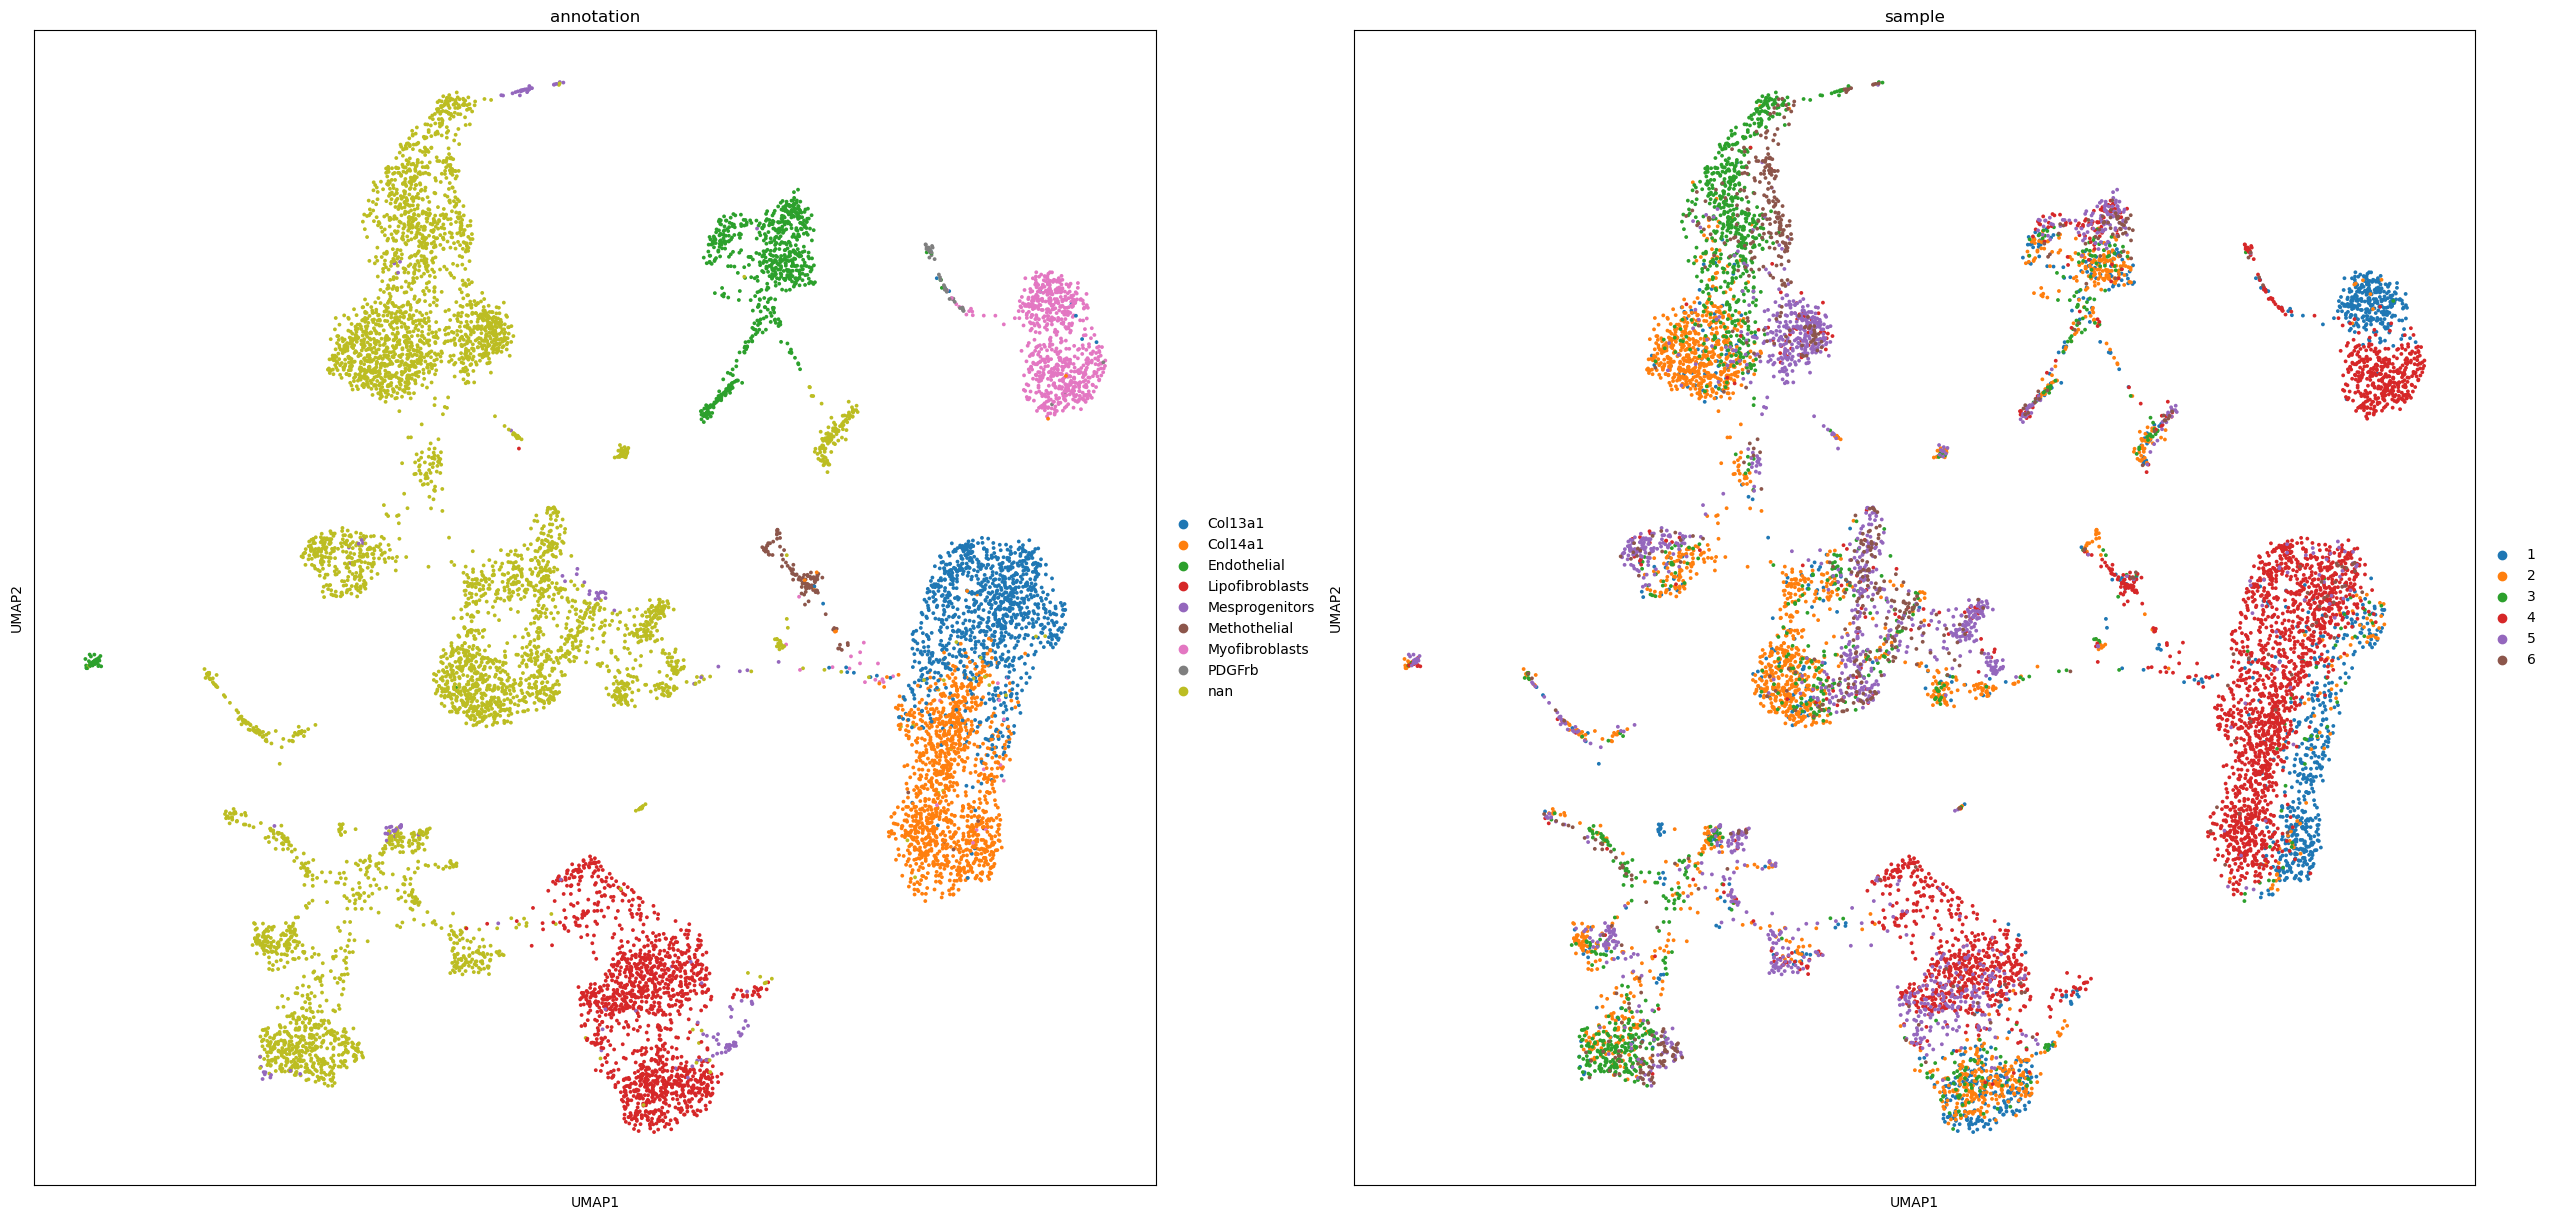

In [22]:
sc.pl.umap(xie_processed, color=['annotation', 'sample'], size=30)

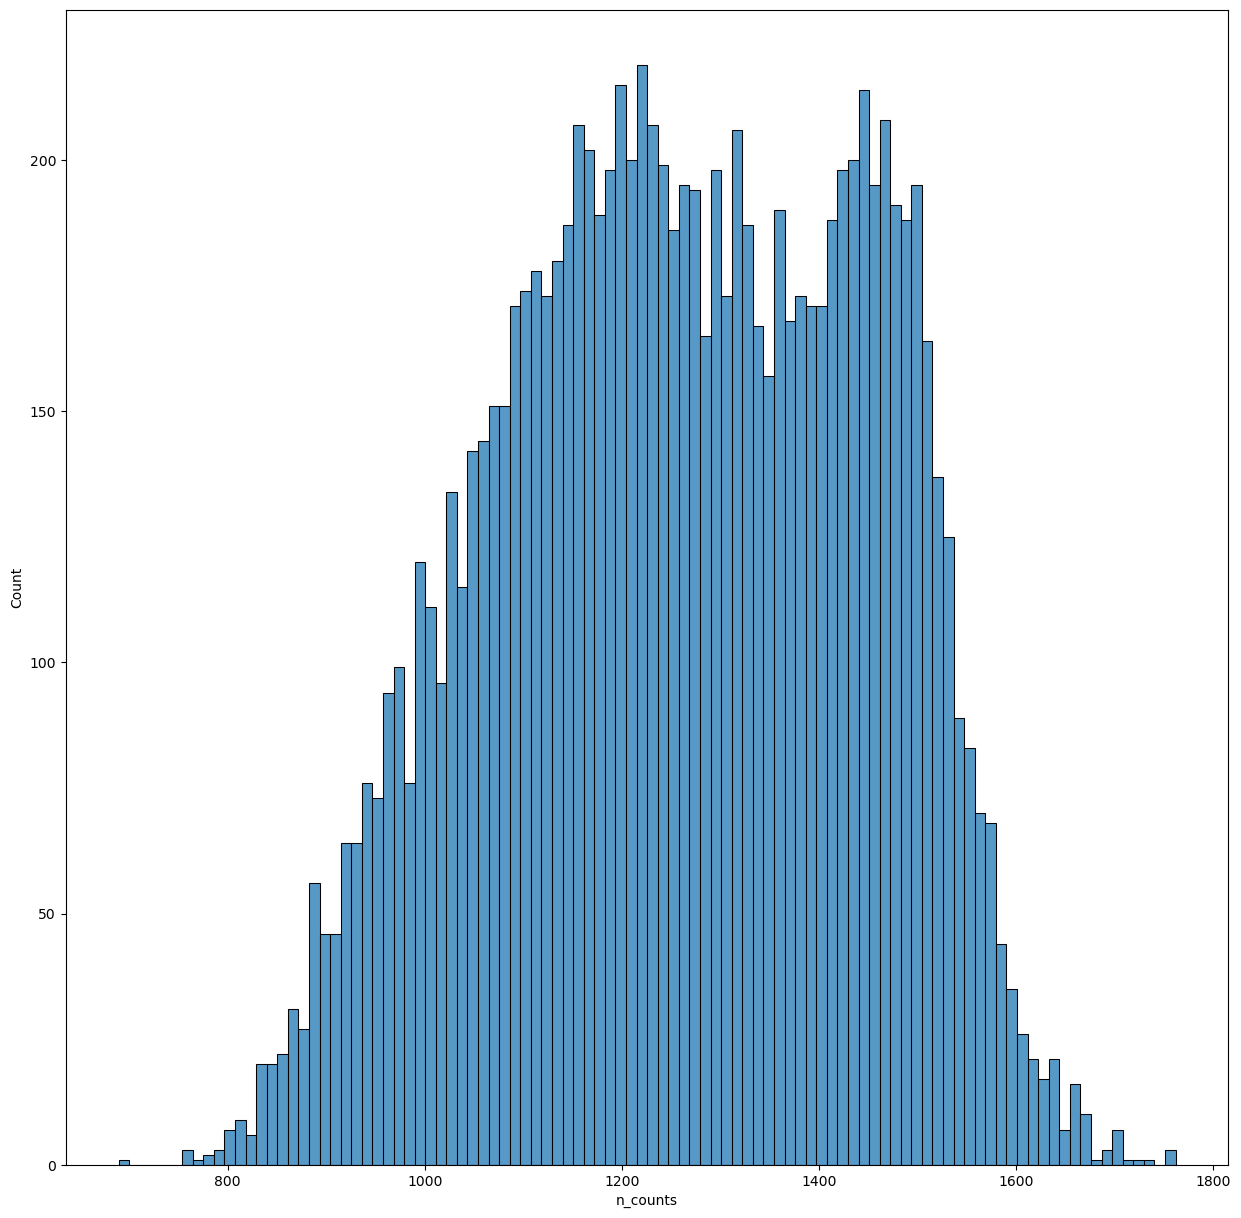

In [23]:
# normalization 
sc.pp.normalize_per_cell(xie_unprocessed)
p3 = sns.histplot(xie_unprocessed.obs["n_counts"], bins=100, kde=False)

In [24]:
anno_ctrl = pd.read_excel('/home/p/pohll/Desktop/MP/data/xie/GSE104154_cell_type_annotation_d0_d21.xlsx', sheet_name=1, index_col='Barcode')
anno_bleo = pd.read_excel('/home/p/pohll/Desktop/MP/data/xie/GSE104154_cell_type_annotation_d0_d21.xlsx', sheet_name=2, index_col='Barcode')

In [25]:
anno_xie = pd.concat([anno_ctrl, anno_bleo])

In [26]:
anno_xie.head()

,defined
Barcode,
AAACCTGAGGACATTA.1,Col13a1
AAACCTGCAGTCGTGC.1,Myofibroblasts
AAACCTGCATGAAGTA.1,Lipofibroblasts
AAACCTGTCTCGCATC.1,Myofibroblasts
AAACGGGTCCTAGAAC.1,Myofibroblasts


In [28]:
xie_processed.obs["annotation"]

index
AAACCTGAGGACATTA-1            Col13a1
AAACCTGCAGTCGTGC-1     Myofibroblasts
AAACCTGCATGAAGTA-1    Lipofibroblasts
AAACCTGTCTCGCATC-1     Myofibroblasts
AAACGGGTCCTAGAAC-1     Myofibroblasts
                           ...       
TTTCCTCGTTTAGGAA-6                nan
TTTGCGCCAATGAAAC-6                nan
TTTGGTTCAGTAGAGC-6                nan
TTTGTCAAGCTACCGC-6                nan
TTTGTCACATCGGGTC-6                nan
Name: annotation, Length: 10337, dtype: category
Categories (9, object): ['Col13a1', 'Col14a1', 'Endothelial', 'Lipofibroblasts', ..., 'Methothelial', 'Myofibroblasts', 'PDGFrb', 'nan']

In [29]:
xie_processed.obs["louvain"]

index
AAACCTGAGGACATTA-1     lipofibroblasts
AAACCTGCAGTCGTGC-1    Hpp1 fibroblasts
AAACCTGCATGAAGTA-1                  Am
AAACCTGTCTCGCATC-1    Hpp1 fibroblasts
AAACGGGTCCTAGAAC-1    Hpp1 fibroblasts
                            ...       
TTTCCTCGTTTAGGAA-6                 AT2
TTTGCGCCAATGAAAC-6           t-cells 1
TTTGGTTCAGTAGAGC-6            b-cells2
TTTGTCAAGCTACCGC-6            b-cells2
TTTGTCACATCGGGTC-6            b-cells2
Name: louvain, Length: 10337, dtype: category
Categories (15, object): ['lipofibroblasts', 'Am', 'b-cells 1', 't-cells 1', ..., '11', 'AT2', 'Adh7+ fibroblasts', '14']

next steps? Variational autoencoder (VAE) based integration

In [1]:
#import scv